In [2]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt
import pickle

In [4]:
basedir = 'dataset'

In [10]:
from deep_visual_odometry.odometry_model_v2 import OdomModelV2

In [6]:
batch_size = 256         # Sequences per batch
num_steps = 16         # Number of sequence steps per batch
rnn_size = 128          # Size of hidden layers in rnn_cell
num_layers = 4           # Number of hidden layers
learning_rate = 0.001   #learning rate

In [8]:
kitti_data = KITTIdata(basedir, 
                       sequences = ['01'],
                       sequence_len = num_steps,
                       val_frac = 0,
                       test_frac = 0,
                       img_size=(150,50))

completed load sequence 01 data


In [9]:
kitti_data.normalize()

normalized data


In [44]:
model = OdomModelV2(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate)

created multi layer rnn cell
rolled out cell for num_steps 
reshaped outputs
shape of outputs (256, 16, 3)
shape of targets (256, 16, 3)
odometry model initialized


In [45]:
loss = model.train(kitti_data, max_count = 250, save_every_n = 50, sequences = ['01'])

training .. 
step: 1  loss: 0.8615  17.6881 sec/batch
step: 2  loss: 0.7449  0.8228 sec/batch
step: 3  loss: 0.8002  0.8122 sec/batch
step: 4  loss: 0.7321  0.8216 sec/batch
step: 5  loss: 0.7142  0.8112 sec/batch
step: 6  loss: 0.6660  0.8162 sec/batch
step: 7  loss: 0.6483  0.8173 sec/batch
step: 8  loss: 0.6212  0.8113 sec/batch
step: 9  loss: 0.5451  0.8182 sec/batch
step: 10  loss: 0.5748  0.8192 sec/batch
step: 11  loss: 0.5710  0.8200 sec/batch
step: 12  loss: 0.5837  0.8312 sec/batch
step: 13  loss: 0.5152  0.8177 sec/batch
step: 14  loss: 0.5367  0.8232 sec/batch
step: 15  loss: 0.5165  0.8111 sec/batch
step: 16  loss: 0.5699  0.8201 sec/batch
step: 17  loss: 0.5124  0.8097 sec/batch
step: 18  loss: 0.5464  0.8107 sec/batch
step: 19  loss: 0.4808  0.8121 sec/batch
step: 20  loss: 0.5346  0.8135 sec/batch
step: 21  loss: 0.4916  0.8214 sec/batch
step: 22  loss: 0.4964  0.8151 sec/batch
step: 23  loss: 0.4886  0.8185 sec/batch
step: 24  loss: 0.5014  0.8204 sec/batch
step: 25  l

step: 199  loss: 0.1567  0.8147 sec/batch
step: 200  loss: 0.1745  0.8318 sec/batch
step: 201  loss: 0.1502  0.8072 sec/batch
step: 202  loss: 0.1719  0.8094 sec/batch
step: 203  loss: 0.1726  0.8071 sec/batch
step: 204  loss: 0.1654  0.8081 sec/batch
step: 205  loss: 0.1542  0.8171 sec/batch
step: 206  loss: 0.1613  0.8238 sec/batch
step: 207  loss: 0.1754  0.8309 sec/batch
step: 208  loss: 0.1576  0.8212 sec/batch
step: 209  loss: 0.1591  0.8132 sec/batch
step: 210  loss: 0.1539  0.8096 sec/batch
step: 211  loss: 0.1708  0.8161 sec/batch
step: 212  loss: 0.1542  0.8083 sec/batch
step: 213  loss: 0.1614  0.8066 sec/batch
step: 214  loss: 0.1487  0.8105 sec/batch
step: 215  loss: 0.1747  0.8184 sec/batch
step: 216  loss: 0.1448  0.8249 sec/batch
step: 217  loss: 0.1703  0.8204 sec/batch
step: 218  loss: 0.1449  0.8320 sec/batch
step: 219  loss: 0.1680  0.8173 sec/batch
step: 220  loss: 0.1617  0.8179 sec/batch
step: 221  loss: 0.1573  0.8129 sec/batch
step: 222  loss: 0.1455  0.8174 se

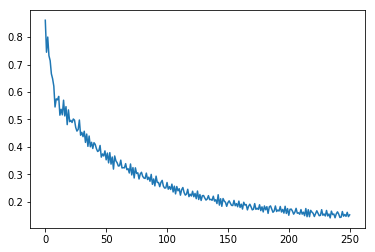

In [46]:
plt.plot(loss)

In [47]:
model_test = OdomModelV2(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate,
                  sampling = True)

created multi layer rnn cell
rolled out cell for num_steps 
reshaped outputs
shape of outputs (1, 1, 3)
shape of targets (1, 1, 3)
odometry model initialized


In [48]:
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence = '01')
inter_inputs.shape

(1100, 5)

In [49]:
checkpoint = tf.train.latest_checkpoint('checkpoints')
predictions = model_test.test(checkpoint, inter_inputs)
predictions.shape

INFO:tensorflow:Restoring parameters from checkpoints/i251_l128.ckpt


(1100, 3)

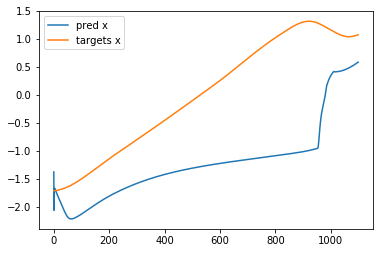

In [50]:
j = 0
plt.plot(predictions[:,j],label = 'pred x')
plt.plot(targets[:,j],label = 'targets x')
plt.legend()
plt.savefig('x_predictions_RNN_iter1000.jpg')
plt.show()

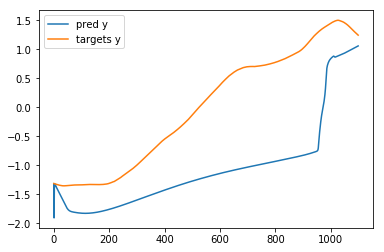

In [51]:
j = 1
plt.plot(predictions[:,j],label = 'pred y')
plt.plot(targets[:,j],label = 'targets y')
plt.legend()
plt.savefig('y_predictions_RNN_iter1000.jpg')
plt.show()

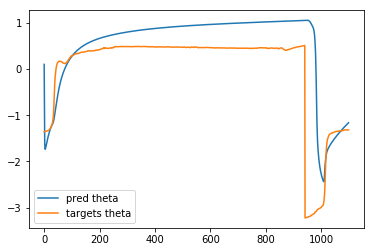

In [52]:
j = 2
plt.plot(predictions[:,j],label = 'pred theta')
plt.plot(targets[:,j],label = 'targets theta')
plt.legend()
plt.savefig('theta_predictions_RNN_iter1000.jpg')
plt.show()

Text(0,0.5,'y')

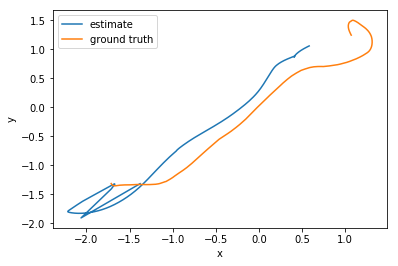

In [53]:
l = 4540
plt.plot(predictions[0:l,0],predictions[0:l,1],label = 'estimate')
plt.plot(targets[0:l,0],targets[0:l,1],label = 'ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')